In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('online_course_engagement_data.csv')
df.head(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


### Qaysi kurslar qancha miqdorda sotilgan

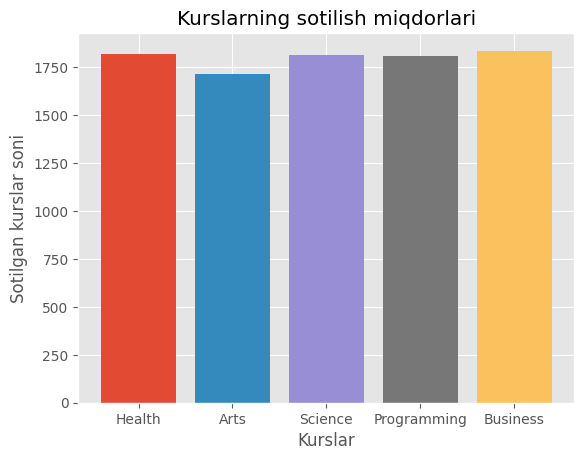

In [98]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
for i in df['CourseCategory'].unique():
    ax.bar(i, sum(df['CourseCategory'] == i))

ax.set_title("Kurslarning sotilish miqdorlari")
ax.set_xlabel("Kurslar")
ax.set_ylabel("Sotilgan kurslar soni")
plt.show()

### Hamma kurslar deyarli bir hil miqdorda sotilgan lekin Arts kursi nisbatan kam sotilgan

### Videoga sarflangan vaqtning o'zlashtirishga ta'siri

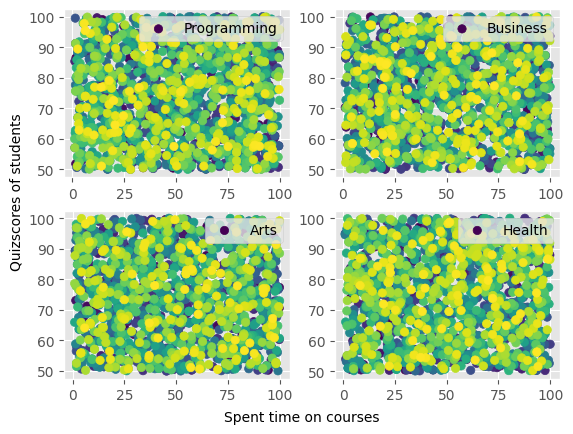

In [99]:
fig, ax = plt.subplots(2, 2)
programming = df[df['CourseCategory'] == 'Programming']
arts = df[df['CourseCategory'] == 'Arts']
business = df[df['CourseCategory'] == 'Business']
health = df[df['CourseCategory'] == 'Health']
ax[0, 0].scatter(programming['TimeSpentOnCourse'], programming['QuizScores'], c = programming.index, label = "Programming")
ax[1, 0].scatter(arts['TimeSpentOnCourse'], arts['QuizScores'], c = arts.index, label = 'Arts')
ax[0, 1].scatter(business['TimeSpentOnCourse'], business['QuizScores'], c = business.index, label = 'Business')
ax[1, 1].scatter(health['TimeSpentOnCourse'], health['QuizScores'], c = health.index, label = 'Health')
ax[0, 0].legend(loc='upper right')
ax[1, 0].legend(loc='upper right')
ax[0, 1].legend(loc='upper right')
ax[1, 1].legend(loc='upper right')
fig.text(0.04, 0.5,'Quizscores of students' , va='center', rotation='vertical')
fig.text(0.375, 0.03, 'Spent time on courses', va='center')

plt.show()

#### Xulosa o'rnida shuni aytishimiz mumkinki bazi o'quvchilar videodarslarni ko'rmasdan ham yuqori baholarni olishgan shuning videodarslarni ko'rish quizlardagi baholarga ta'sirini aniqlolmaymiz

### Kurslarning qiyinchilik darajalarini aniqlaymiz

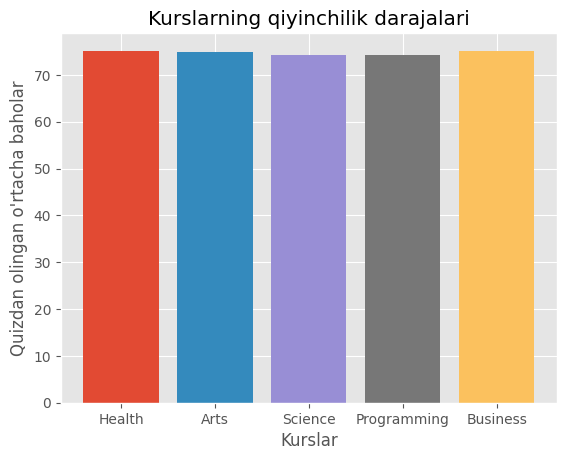

In [100]:
fig, ax = plt.subplots()
for i in df['CourseCategory'].unique():
    ax.bar(i, df[df['CourseCategory'] == i]['QuizScores'].mean())
ax.set_title("Kurslarning qiyinchilik darajalari")
ax.set_ylabel("Quizdan olingan o'rtacha baholar")
ax.set_xlabel("Kurslar")
plt.show()

#### Kurslarning qiyinchilik darajalari sal kam bir xil biz chiqargan natijaga qaraydigan bo'lsak

### Yangi csv fileni ochib oldim analiz qilish uchun

In [101]:
df2 = pd.read_csv('Online sales Data.csv')
df2.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


### Qanday kartalar bilan bilan mahsulotlarga to'lov qilingan?

In [102]:
df2['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

#### To'lovlar 3xil usulda ya'ni 'Credit Card', 'Paypal', 'Debit Card' orqali amalga oshirilgan

#### Bu kartalar orqali qilingan umumiy haridlarning umumiy summalari qancha?

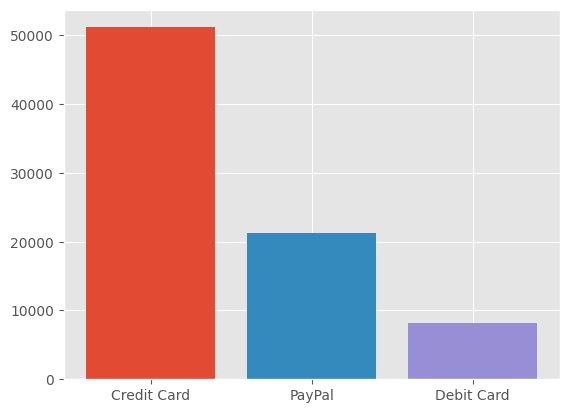

In [103]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
for i in df2['Payment Method'].unique():
    ax.bar(i, df2[df2['Payment Method'] == i]['Total Revenue'].sum())
plt.show()

#### Grafik shuni ko'rsatadikiy deyarli $51000 lik to'lovlar 'Credit Card' bilan qilingan va bu 'Paypal' da qilingandan 2.5 barobar ko'proq. Eng kam haridlar 'Debit Card' orqali amalga oshirilgan grafik bo'yicha $7000-8000

### 2024-yil yanvar oyida umumiy kunlik haridlarning o'zgarib borish grafigi

C:\Users\User\AppData\Local\Temp\ipykernel_8104\2424455587.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df2['Date'], rotation = 90)


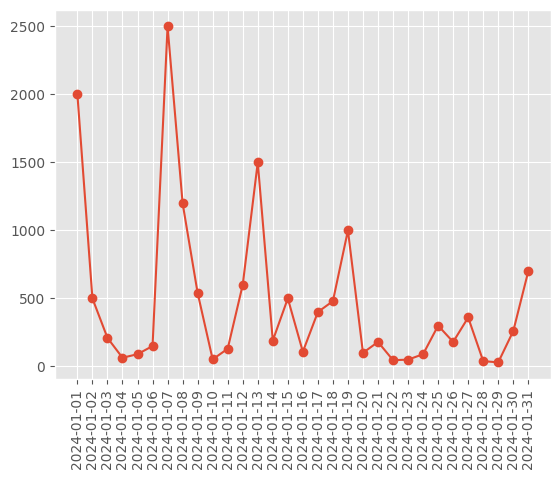

In [104]:
revenue_over_time = df2.groupby('Date')['Total Revenue'].sum().head(31)
fig, ax = plt.subplots()
ax.plot(revenue_over_time.index, revenue_over_time.values, marker = 'o')
ax.set_xticklabels(df2['Date'], rotation = 90)
plt.show()

#### Bu grafik bilan yil boshida yangi yil bayrami munosabati bilan bilan haridlar ancha yuqori bo'lgan oy oxirlayverib sotuvlar ham kamaygan degan xulosaga kelishimiz mumkin

### Futbol komandalari haqidagi datasetdan fudbolchilarning o'rtacha yoshi klub narxiga qanday ta'sir qilishini ko'ramiz

In [105]:
plt.style.use('default')
import seaborn as sns
football = pd.read_csv("Football_teams_price_data.csv")
football['Price'] = football['Price'].str.replace(',', '').astype(int)
football_new = football.iloc[:100]

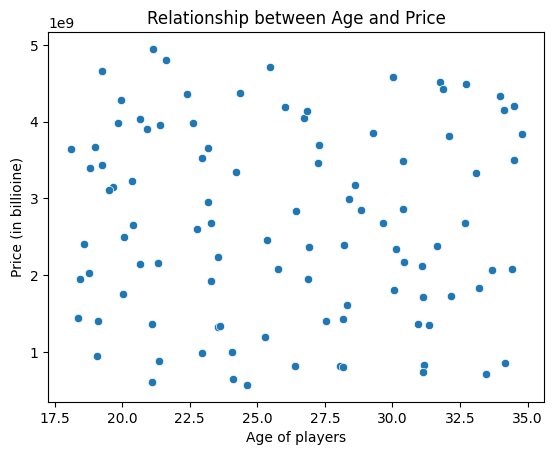

In [106]:
sns.scatterplot(x = football_new['AveragePlayerAge'], y =  football_new['Price'], data = football_new)
plt.ylabel("Price (in billioine)")
plt.xlabel("Age of players")
plt.title("Relationship between Age and Price")
plt.show()

#### Scatterlotdan shu ma'lum bo'ldiki fudbol klublarining narxiga fudbolchilarning o'rtacha yoshi qay darajada ta'sir qilishini aniqlolmaymiz

### Barcha davlat clublarining o'tgan mavsumda gollar ko'rsatgichlarini boxplot bilan ko'ramiz

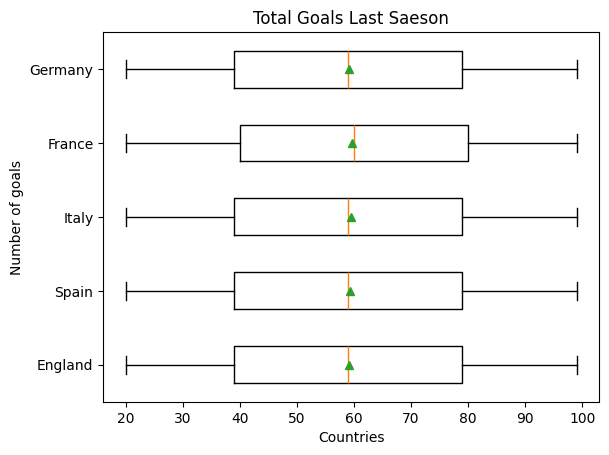

In [132]:
countries = football['Country'].unique()
data = [football[football['Country'] == country]['TotalGoalsLastSeason'] for country in countries]

fig, ax = plt.subplots()
ax.boxplot(data, tick_labels = countries, vert=False, showmeans = True)
ax.set_ylabel('Number of goals')
ax.set_xlabel('Countries')
ax.set_title("Total Goals Last Saeson")
plt.show()

#### Ispaniya klublarining ko'rsatkichlari Angliya klublari

#### Bizning datasetimizda yevropaning top 5 davlatlarining ma'lumotlari bor ekan va ularning klublarining gollar ko'rsatgichi bir-biridan uncha farq qilmaydi ya'ni o'rtacha ko'rsatgich barchasi uchun 60 atrofida va outlierlar ham yo'q